In [1]:
import pandas as pd 
import datetime 
import numpy as np
import scipy.stats
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from pandas import DataFrame
import itertools

In [21]:
start_date = datetime.datetime(2015, 12, 5)
end_date = datetime.datetime(2017, 12, 5)

In [39]:
ticker = ["BTC-USD", "LTC-USD", "BCH-USD","ETH-USD", "IOT-USD", "XRP-USD"]
source = 'yahoo' 

In [ ]:
all_data = {ticker:web.DataReader(ticker,source,start_date,end_date)
            for ticker in ["BTC-USD", "LTC-USD", "BCH-USD","ETH-USD", "IOT-USD", "XRP-USD"]}


In [ ]:
ticker_price = pd.DataFrame({ticker: data['Adj Close']
                                  for ticker, data in all_data.items()})


In [ ]:

def geometric_brownian_motion(T = 1, N = 100, mu = 0.1, sigma = 0.01, S0 = 20):        
    dt = float(T)/N
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size = N) 
    W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
    X = (mu-0.5*sigma**2)*t + sigma*W 
    S = S0*np.exp(X) ### geometric brownian motion ###
    return S
dates = pd.date_range('2015-12-05', '2017-12-05')
T = (dates.max()-dates.min()).days / 365
N = dates.size


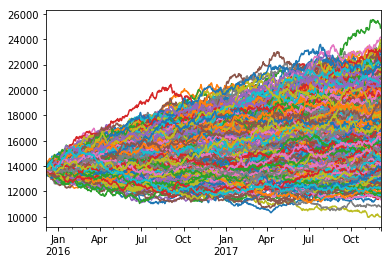

In [137]:
start_price = ticker_price["BTC-USD"][-1]
btc_list = []
for i in range(1000):
    btc = pd.Series(geometric_brownian_motion(T, N, sigma=0.1, S0=start_price), index=dates)
    btc.plot()    
plt.show()

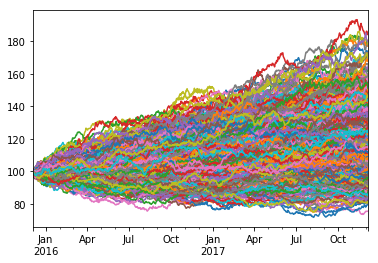

In [83]:
start_price = ticker_price["LTC-USD"][-1]
for i in range(1000):
    ltc = pd.Series(geometric_brownian_motion(T, N, sigma=0.1, S0=start_price), index=dates)
    ltc.plot()    
plt.show()

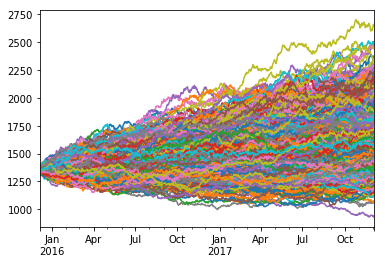

In [84]:
start_price = ticker_price["BCH-USD"][-1]
for i in range(1000):
    bch = pd.Series(geometric_brownian_motion(T, N, sigma=0.1, S0=start_price), index=dates)
    bch.plot()    
plt.show()

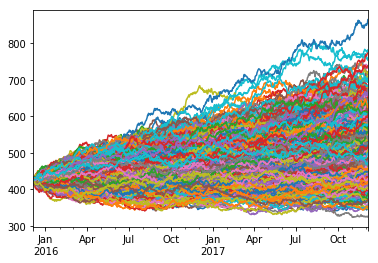

In [70]:
start_price = ticker_price["ETH-USD"][-1]
for i in range(1000):
    eth = pd.Series(geometric_brownian_motion(T, N, sigma=0.1, S0=start_price), index=dates)
    eth.plot()    
plt.show()

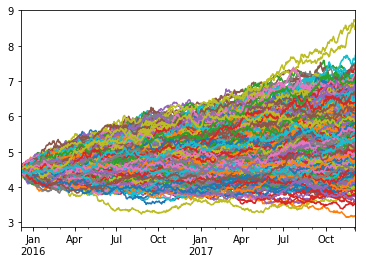

In [85]:
start_price = ticker_price["IOT-USD"][-1]
for i in range(1000):
    iot = pd.Series(geometric_brownian_motion(T, N, sigma=0.1, S0=start_price), index=dates)
    iot.plot()    
plt.show()

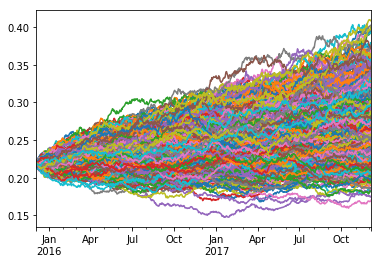

In [86]:
start_price = ticker_price["XRP-USD"][-1]
for i in range(1000):
    xrp = pd.Series(geometric_brownian_motion(T, N, sigma=0.1, S0=start_price), index=dates)
    xrp.plot()    
plt.show()



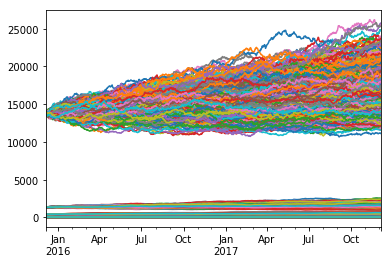

In [89]:
#Combining into a single chart:
for tick in ["BTC-USD", "LTC-USD", "BCH-USD","ETH-USD", "IOT-USD", "XRP-USD"]:
    start_price = ticker_price[tick][-1]
    for i in range(1000):
        y = pd.Series(geometric_brownian_motion(T, N, sigma=0.1, S0=start_price), index=dates)
        y.plot()    
plt.show()


In [112]:
#Monte Carlo Simulation
xrp_num = np.array(xrp,dtype = pd.Series)
xrp_dat = xrp.to_frame()

xrp_done= xrp_dat.reset_index()

In [ ]:
def monte_carlo(df, n=1000,verbose=False):
    print('Doing the MC simulation ...')
    simulation = {}
    for (name, series) in df.iterrows():
        votes = np.random.rand(n)
        s = series[series > 0.0]
        labels = s.index.tolist()
        cuts = [0.0] + s.cumsum().tolist()
        # and simulate
        simulation[name] = pd.cut(votes, bins=cuts, labels=labels, precision=7)
    simulation = pd.DataFrame(simulation)
    return simulation


 